In [4]:
# take a set of documents (a corpus) to train our model; we'll be using a default corpus included in gensim package

import gensim
import os
import collections
import smart_open
import random

# Set file names for train and test data
test_data_dir = '{}'.format(os.sep).join([gensim.__path__[0], 'test', 'test_data'])
lee_train_file = test_data_dir + os.sep + 'lee_background.cor'
lee_test_file = test_data_dir + os.sep + 'lee.cor'

## Define a function to read and preprocess (corpus) file

In [5]:
def read_corpus(fname, tokens_only=False):
    with smart_open.smart_open(fname, encoding="iso-8859-1") as f:
        for i, line in enumerate(f):
            if tokens_only:
                # 'yield' returns a generator, useful for large set of data (in terms of memory consumption)
                yield gensim.utils.simple_preprocess(line)
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(line), [i])

In [6]:
train_corpus = list(read_corpus(lee_train_file))  # train data has tag associated to each document
test_corpus = list(read_corpus(lee_test_file, tokens_only=True))



## Training the model

In [7]:
# instantiate Doc2Vec object
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)

# Essentially, the vocabulary is a dictionary (accessible via model.wv.vocab) of all of the unique words extracted
# from the training corpus along with the count (e.g., model.wv.vocab['penalty'].count for counts for the word penalty).

# this vocabulary is used to represent words and documents as vectors
model.build_vocab(train_corpus)



In [8]:
%time model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)


CPU times: user 6.35 s, sys: 76 ms, total: 6.42 s
Wall time: 2.74 s


## Inferring a vector 

In [9]:
# One important thing to note is that you can now infer a vector for any piece of text 
# without having to re-train the model
# This vector (generated from this document) can then be compared with other vectors via cosine similarity.
model.infer_vector(['only', 'you', 'can', 'prevent', 'forest', 'fires'])

# Note that infer_vector() does not take a string, but rather a list of string tokens,
# which should have already been tokenized the same way as the words property of original training document objects.

# the underlying training/inference algorithms are an iterative approximation problem that makes use of internal randomization, 
# repeated inferences of the same text will return slightly different vectors.

array([-0.16999331,  0.1012315 , -0.23506814, -0.01124856,  0.30688623,
        0.16078861, -0.00644738, -0.16053137, -0.3081378 , -0.11048444,
       -0.03026261, -0.01623827,  0.14595601,  0.0026754 ,  0.06123024,
       -0.03907201, -0.07066187,  0.02581681,  0.13902222,  0.16819759,
       -0.043812  ,  0.01738269, -0.02022651,  0.23334119,  0.13931751,
       -0.05302273, -0.0102173 , -0.00827293, -0.08906103, -0.01244812,
       -0.03293726,  0.02035635, -0.0130419 , -0.13051239,  0.366265  ,
        0.13289651, -0.05009717, -0.03655452, -0.06671809,  0.02063492,
        0.10780098,  0.05621843, -0.18863109, -0.1495434 ,  0.10851085,
       -0.01378285,  0.10590136, -0.08507477,  0.03826743,  0.09270052],
      dtype=float32)

## Assessing Model

In [13]:
# Pick a random document from the test corpus and infer a vector from the model
doc_id = random.randint(0, len(test_corpus) - 1)
inferred_vector = model.infer_vector(test_corpus[doc_id])
sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))

# Compare and print the most/median/least similar documents from the train corpus
print('Test Document ({}): «{}»\n'.format(doc_id, ' '.join(test_corpus[doc_id])))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))

Test Document (10): «iraq and russia are close to signing billion economic cooperation plan iraq ambassador said saturday deal that could put moscow at odds with the united states as it considers military attack against baghdad the statement by ambassador abbas khalaf came amid indications that russia despite its strong support for the post sept antiterrorism coalition is maintaining or improving ties with iran and north korea which together with iraq are the countries president bush has labeled the axis of evil»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec(dm/m,d50,n5,w5,mc2,s0.001,t3):

MOST (26, 0.7779335975646973): «pakistan president pervez musharraf says he is ready to meet indian prime minister atal behari vajpayee as fears grow of war between the two countries tensions have escalated since suicide attack on the indian parliament two weeks ago india alleges the attack was backed by the pakistani intelligence service general musharraf says pakistan will never initiate conflict betw

/home/nick/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Run Y = tsne.tsne(X, no_dims, perplexity) to perform t-SNE on your dataset.
Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 2...
Mean value of sigma: 33554432.000000
Iteration 10: error is 5.545177
Iteration 20: error is 5.545177
Iteration 30: error is 5.545177
Iteration 40: error is 5.545177
Iteration 50: error is 5.545177
Iteration 60: error is 5.545177
Iteration 70: error is 5.545177
Iteration 80: error is 5.545177
Iteration 90: error is 5.545177
Iteration 100: error is 5.545177
Iteration 110: error is -0.000000
Iteration 120: error is -0.000000
Iteration 130: error is -0.000000
Iteration 140: error is -0.000000
Iteration 150: error is -0.000000
Iteration 160: error is -0.000000
Iteration 170: error is -0.000000
Iteration 180: error is -0.000000
Iteration 190: error is -0.000000
Iteration 200: error is -0.000000
Iteration 210: error is -0.000000
Iteration 220: error is -0.000000
Iteration 230: error is -0.000000
Iteration 240: er

/home/nick/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Iteration 690: error is -0.000000
Iteration 700: error is -0.000000
Iteration 710: error is -0.000000
Iteration 720: error is -0.000000
Iteration 730: error is -0.000000
Iteration 740: error is -0.000000
Iteration 750: error is -0.000000
Iteration 760: error is -0.000000
Iteration 770: error is -0.000000
Iteration 780: error is -0.000000
Iteration 790: error is -0.000000
Iteration 800: error is -0.000000
Iteration 810: error is -0.000000
Iteration 820: error is -0.000000
Iteration 830: error is -0.000000
Iteration 840: error is -0.000000
Iteration 850: error is -0.000000
Iteration 860: error is -0.000000
Iteration 870: error is -0.000000
Iteration 880: error is -0.000000
Iteration 890: error is -0.000000
Iteration 900: error is -0.000000
Iteration 910: error is -0.000000
Iteration 920: error is -0.000000
Iteration 930: error is -0.000000
Iteration 940: error is -0.000000
Iteration 950: error is -0.000000
Iteration 960: error is -0.000000
Iteration 970: error is -0.000000
Iteration 980:

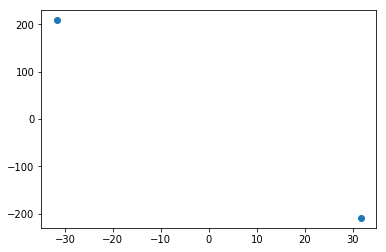

In [12]:
#
#  tsne.py
#
# Implementation of t-SNE in Python. The implementation was tested on Python
# 2.7.10, and it requires a working installation of NumPy. The implementation
# comes with an example on the MNIST dataset. In order to plot the
# results of this example, a working installation of matplotlib is required.
#
# The example can be run by executing: `ipython tsne.py`
#
#
#  Created by Laurens van der Maaten on 20-12-08.
#  Copyright (c) 2008 Tilburg University. All rights reserved.

import numpy as np
import pylab
import random 


def Hbeta(D=np.array([]), beta=1.0):
    """
        Compute the perplexity and the P-row for a specific value of the
        precision of a Gaussian distribution.
    """

    # Compute P-row and corresponding perplexity
    P = np.exp(-D.copy() * beta)
    sumP = sum(P)
    H = np.log(sumP) + beta * np.sum(D * P) / sumP
    P = P / sumP
    return H, P


def x2p(X=np.array([]), tol=1e-5, perplexity=30.0):
    """
        Performs a binary search to get P-values in such a way that each
        conditional Gaussian has the same perplexity.
    """

    # Initialize some variables
    print("Computing pairwise distances...")
    (n, d) = X.shape
    sum_X = np.sum(np.square(X), 1)
    D = np.add(np.add(-2 * np.dot(X, X.T), sum_X).T, sum_X)
    P = np.zeros((n, n))
    beta = np.ones((n, 1))
    logU = np.log(perplexity)

    # Loop over all datapoints
    for i in range(n):

        # Print progress
        if i % 500 == 0:
            print("Computing P-values for point %d of %d..." % (i, n))

        # Compute the Gaussian kernel and entropy for the current precision
        betamin = -np.inf
        betamax = np.inf
        Di = D[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))]
        (H, thisP) = Hbeta(Di, beta[i])

        # Evaluate whether the perplexity is within tolerance
        Hdiff = H - logU
        tries = 0
        while np.abs(Hdiff) > tol and tries < 50:

            # If not, increase or decrease precision
            if Hdiff > 0:
                betamin = beta[i].copy()
                if betamax == np.inf or betamax == -np.inf:
                    beta[i] = beta[i] * 2.
                else:
                    beta[i] = (beta[i] + betamax) / 2.
            else:
                betamax = beta[i].copy()
                if betamin == np.inf or betamin == -np.inf:
                    beta[i] = beta[i] / 2.
                else:
                    beta[i] = (beta[i] + betamin) / 2.

            # Recompute the values
            (H, thisP) = Hbeta(Di, beta[i])
            Hdiff = H - logU
            tries += 1

        # Set the final row of P
        P[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))] = thisP

    # Return final P-matrix
    print("Mean value of sigma: %f" % np.mean(np.sqrt(1 / beta)))
    return P


def pca(X=np.array([]), no_dims=50):
    """
        Runs PCA on the NxD array X in order to reduce its dimensionality to
        no_dims dimensions.
    """

    print("Preprocessing the data using PCA...")
    (n, d) = X.shape
    X = X - np.tile(np.mean(X, 0), (n, 1))
    (l, M) = np.linalg.eig(np.dot(X.T, X))
    Y = np.dot(X, M[:, 0:no_dims])
    return Y


def tsne(X=np.array([]), no_dims=2, initial_dims=50, perplexity=30.0):
    """
        Runs t-SNE on the dataset in the NxD array X to reduce its
        dimensionality to no_dims dimensions. The syntaxis of the function is
        `Y = tsne.tsne(X, no_dims, perplexity), where X is an NxD NumPy array.
    """

    # Check inputs
    if isinstance(no_dims, float):
        print("Error: array X should have type float.")
        return -1
    if round(no_dims) != no_dims:
        print("Error: number of dimensions should be an integer.")
        return -1

    # Initialize variables
    X = pca(X, initial_dims).real
    (n, d) = X.shape
    max_iter = 1000 
    initial_momentum = 0.5
    final_momentum = 0.8
    eta = 500
    min_gain = 0.01
    Y = np.random.randn(n, no_dims)
    dY = np.zeros((n, no_dims))
    iY = np.zeros((n, no_dims))
    gains = np.ones((n, no_dims))

    # Compute P-values
    P = x2p(X, 1e-5, perplexity)
    P = P + np.transpose(P)
    P = P / np.sum(P)
    P = P * 4.									# early exaggeration
    P = np.maximum(P, 1e-12)

    # Run iterations
    for iter in range(max_iter):

        # Compute pairwise affinities
        sum_Y = np.sum(np.square(Y), 1)
        num = -2. * np.dot(Y, Y.T)
        num = 1. / (1. + np.add(np.add(num, sum_Y).T, sum_Y))
        num[range(n), range(n)] = 0.
        Q = num / np.sum(num)
        Q = np.maximum(Q, 1e-12)

        # Compute gradient
        PQ = P - Q
        for i in range(n):
            dY[i, :] = np.sum(np.tile(PQ[:, i] * num[:, i], (no_dims, 1)).T * (Y[i, :] - Y), 0)

        # Perform the update
        if iter < 20:
            momentum = initial_momentum
        else:
            momentum = final_momentum
        gains = (gains + 0.2) * ((dY > 0.) != (iY > 0.)) + \
                (gains * 0.8) * ((dY > 0.) == (iY > 0.))
        gains[gains < min_gain] = min_gain
        iY = momentum * iY - eta * (gains * dY)
        Y = Y + iY
        Y = Y - np.tile(np.mean(Y, 0), (n, 1))

        # Compute current value of cost function
        if (iter + 1) % 10 == 0:
            C = np.sum(P * np.log(P / Q))
            print("Iteration %d: error is %f" % (iter + 1, C))

        # Stop lying about P-values
        if iter == 100:
            P = P / 4.

    # Return solution
    return Y


if __name__ == "__main__":
    print("Run Y = tsne.tsne(X, no_dims, perplexity) to perform t-SNE on your dataset.")
    # Pick a random document from the test corpus and infer a vector from the model
    doc_id = random.randint(0, len(test_corpus) - 1)
    inferred_vector = model.infer_vector(test_corpus[doc_id])
    sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
    similar_inferred_vector = model.infer_vector(train_corpus[sims[0][0]].words)
    # Creating array np array with 2 rows: one row is the inferred_vector, the second one is the most
    # similar document vector
    
    X = np.array([inferred_vector, similar_inferred_vector])
    Y = tsne(X, 2, 50, 20.0)
    #pylab.scatter(Y[:, 0], Y[:, 1], 20, labels)
    pylab.scatter(Y[:, 0], Y[:, 1])
    pylab.show()